## DeepLearning03(노드07~노드10)


### 노드07 : 모델 저장과 콜백

#### 07-01 MNIST모델 예제

##### 모듈 임포트

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers, utils

##### 데이터 전처리

In [ ]:
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data(path='mnist.npz')

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.3, random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape}  레이블: {y_train_full.shape}")
print(f"학습용 데이터: {x_train.shape}  레이블: {y_train.shape}")
print(f"검증용 데이터: {x_val.shape}  레이블: {y_val.shape}")
print(f"테스트용 데이터: {x_test.shape}  레이블: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
전체 학습 데이터: (60000, 28, 28)  레이블: (60000,)
학습용 데이터: (42000, 28, 28)  레이블: (42000,)
검증용 데이터: (18000, 28, 28)  레이블: (18000,)
테스트용 데이터: (10000, 28, 28)  레이블: (10000,)


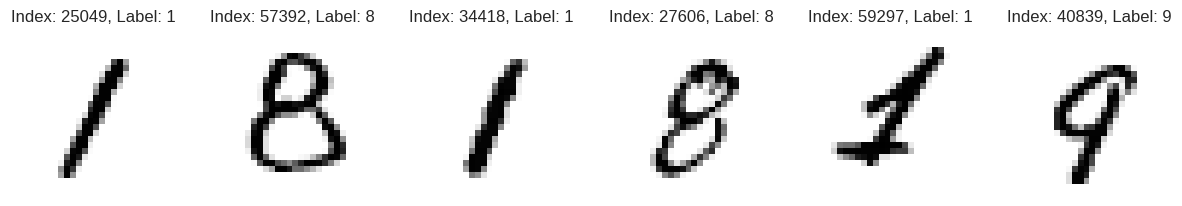

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-white")

num_sample = 6
random_idxs = np.random.randint(60000, size=num_sample)

plt.figure(figsize=(15, 3))

for i, idx in enumerate(random_idxs):
  img = x_train_full[idx,:]
  label = y_train_full[idx]

  plt.subplot(1,len(random_idxs),i+1)
  plt.axis('off')
  plt.title(f'Index: {idx}, Label: {label}')
  plt.imshow(img)

In [ ]:
# import matplotlib.pyplot as plt
# plt.style.available


In [ ]:
print(y_train[0])

4


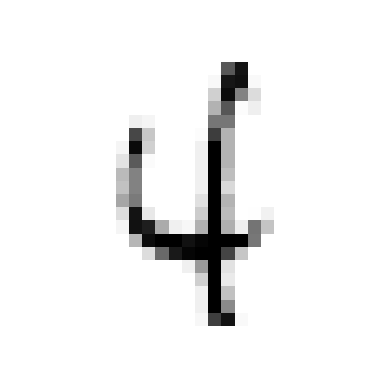

In [ ]:
img = x_train[0, :]
plt.axis('off')
plt.imshow(img)

In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 184 236
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  13 235 240
   11   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  73 244 144
   59   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 104 186   6
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  33  21   0   0   0   0 15

In [ ]:
# 픽셀값 0~255 이므로, 255로 나눠주면 범위가 0~1이 됨(일종의 scaling)

x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

print(y_train[0])
print(y_val[0])
print(y_test[0])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


##### 모델 구성

In [ ]:
model = models.Sequential()
model.add(keras.Input(shape = (28,28), name = 'input' ))
model.add(layers.Flatten(input_shape=[28, 28], name='flatten'))
model.add(layers.Dense(100, activation='relu',name = 'dense1'))
model.add(layers.Dense(64, activation='relu', name = 'dense2'))
model.add(layers.Dense(32, activation='relu', name = 'dense3'))
model.add(layers.Dense(10, activation='softmax', name = 'output'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 87,374 (341.30 KB)

 Trainable params: 87,374 (341.30 KB)

 Non-trainable params: 0 (0.00 B)

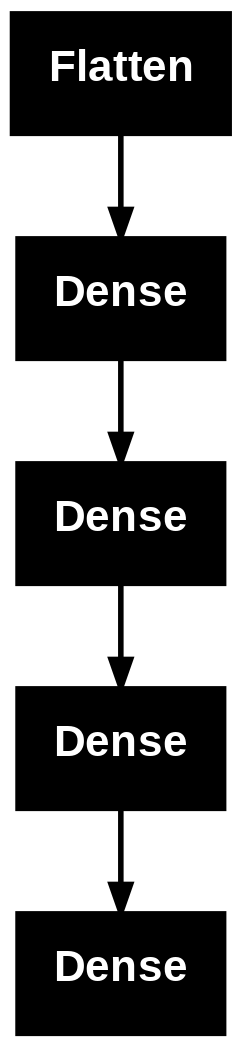

In [ ]:
utils.plot_model(model)

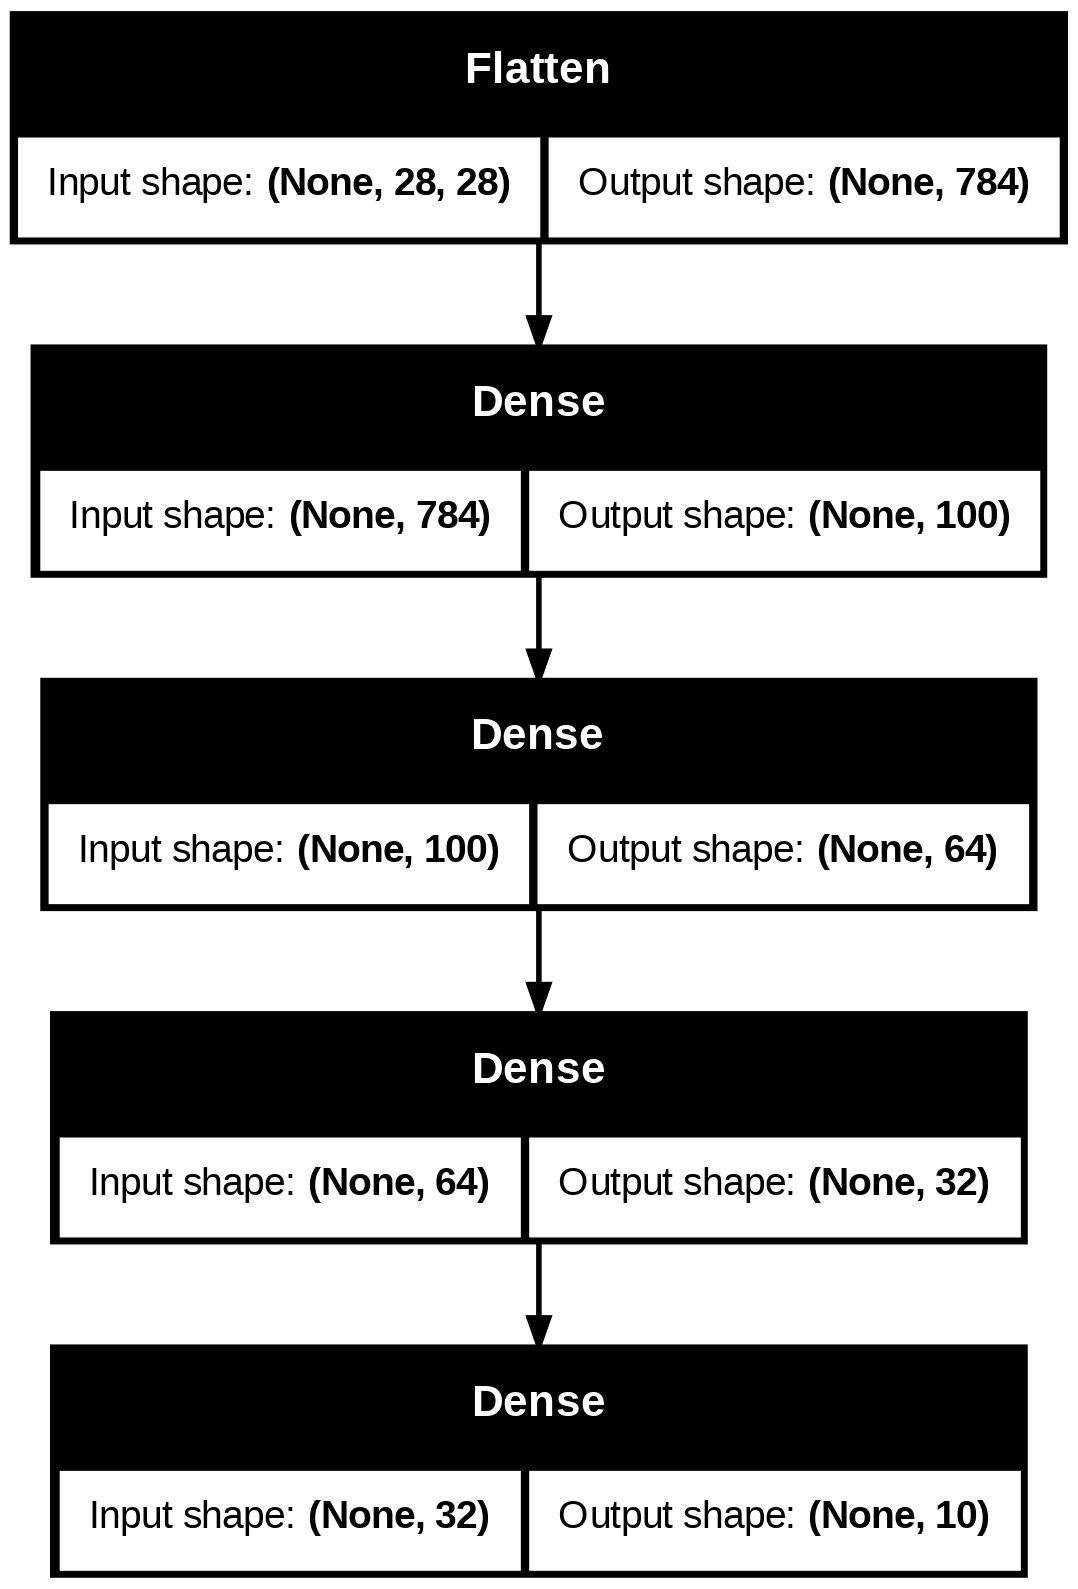

In [ ]:
utils.plot_model(model, show_shapes=True)

##### 모델 컴파일 및 학습
- 구성한 모델에 손실 함수로는 다중 분류로 클래스가 원-핫 인코딩 방식으로 되어 있을 때 사용하는 categorical_crossentropy를 지정하고, 옵티마이저는 가장 기본적인 sgd을 지정

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val))

Epoch 1/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.3103 - loss: 2.0770 - val_accuracy: 0.7078 - val_loss: 1.0695
Epoch 2/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7712 - loss: 0.8782 - val_accuracy: 0.8124 - val_loss: 0.6015
Epoch 3/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8594 - loss: 0.5198 - val_accuracy: 0.8728 - val_loss: 0.4438
Epoch 4/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8849 - loss: 0.4147 - val_accuracy: 0.8889 - val_loss: 0.3835
Epoch 5/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8982 - loss: 0.3609 - val_accuracy: 0.8992 - val_loss: 0.3484
Epoch 6/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9075 - loss: 0.3287 - val_accuracy: 0.9048 - val_loss: 0.3288
Epoch 7/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9091 - loss: 0.3156 - val_accuracy: 0.9077 - val_loss: 0.3069
Epoch 8/50
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9194 - loss: 0.2895 - val_accuracy: 0

In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

##### 모델 평가 및 예측

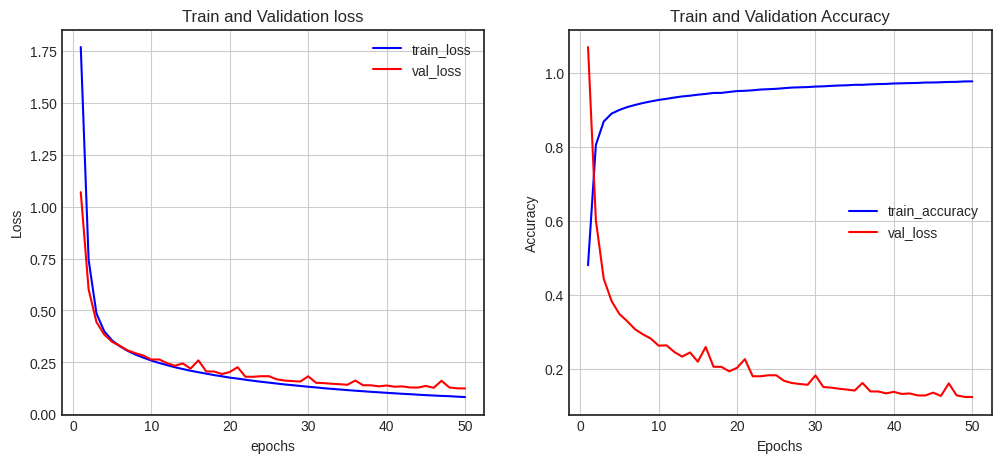

In [ ]:
history_dict = history.history # accuracy, loss, val_accuracy, val_loss 의 history(epoch=50)

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_loss, color='red', label='val_loss')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9612 - loss: 0.1335


[0.11558494716882706, 0.965399980545044]

In [ ]:
pred_ys = model.predict(x_test)
print(pred_ys.shape)
print(pred_ys[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(10000, 10)
[3.2118933e-05 1.4903940e-06 5.6829886e-04 1.2092998e-03 7.2425306e-09
 2.5481375e-05 9.9950347e-11 9.9802643e-01 5.2410514e-06 1.3162683e-04]


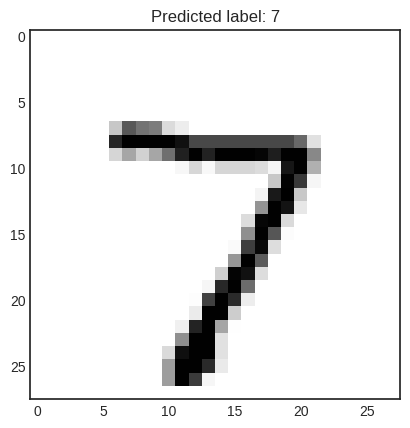

In [ ]:
arg_pred_y = np.argmax(pred_ys, axis=1)

plt.title(f'Predicted label: {arg_pred_y[0]}')
plt.imshow(x_test[0])
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=-1), np.argmax(pred_ys, axis=-1)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.97      0.96      0.97      1010
           4       0.96      0.97      0.97       982
           5       0.97      0.95      0.96       892
           6       0.95      0.98      0.96       958
           7       0.98      0.95      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.94      0.96      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.96      0.97     10000
weighted avg       0.97      0.97      0.97     10000



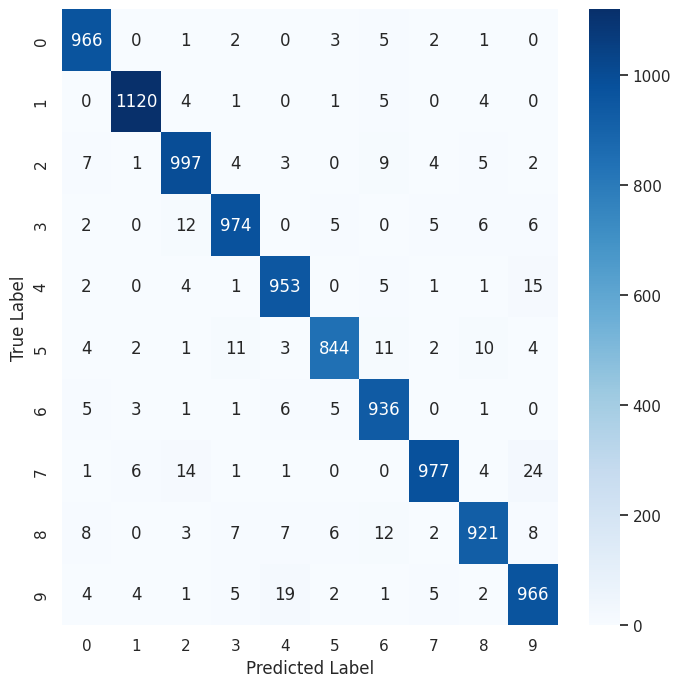

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(8, 8))
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(pred_ys, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 해석 : 위 모델은 9를 맞추기 가장 어려워했고, 숫자4와 혼동을 함

#### 07-02 모델 저장과 로드
- 모델을 저장할 때는 save() 함수를 사용하여 쉽게 저장할 수 있고, 다시 모델을 불러올 때는 load_model() 함수를 사용

##### 모델 저장/로드

In [ ]:
# model.save('mnist_model.h5') # model.save('my_model.keras')
model.save('mnist_model.keras')

In [ ]:
loaded_model = models.load_model('mnist_model.keras') # .keras 형태로 저장하라고 colab은 warning을 함
loaded_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 174,750 (682.62 KB)

 Trainable params: 87,374 (341.30 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 87,376 (341.32 KB)

In [ ]:
pred_ys2 = loaded_model.predict(x_test)
print(pred_ys2.shape)
print(pred_ys2[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)
[3.2118933e-05 1.4903940e-06 5.6829886e-04 1.2092998e-03 7.2425306e-09
 2.5481375e-05 9.9950347e-11 9.9802643e-01 5.2410514e-06 1.3162683e-04]


##### 모델 colab에서 로컬로 받을 때

In [ ]:
# from google.colab import files
# files.download('mnist_model.keras')  # 파일명을 저장한 그대로 넣으면 됩니다

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 모델 용량이 너무 크다 싶을 때 압축도 가능함
# !zip mnist_model.zip mnist_model.keras
# files.download('mnist_model.zip')

In [ ]:
pred_ys2 = loaded_model.predict(x_test)  # np.argmax(pred_ys, axis=1)
print(pred_ys2.shape)
print(pred_ys2[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)
[3.2118933e-05 1.4903940e-06 5.6829886e-04 1.2092998e-03 7.2425306e-09
 2.5481375e-05 9.9950347e-11 9.9802643e-01 5.2410514e-06 1.3162683e-04]


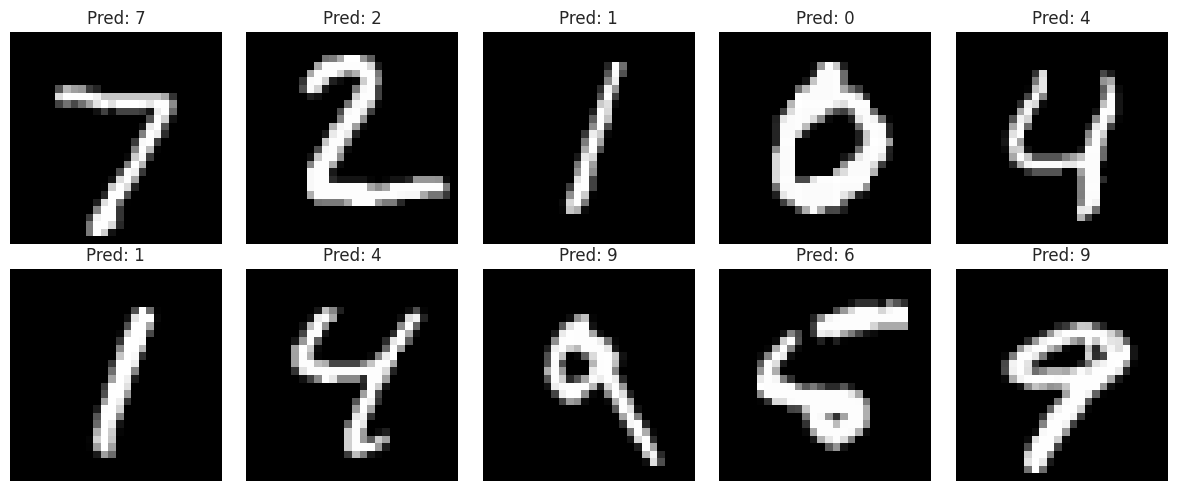

In [ ]:
#예측값 시각화하기
arg_pred_y2 = np.argmax(pred_ys2, axis=1) #[[YOUR CODE]]

#matlotlib를 이용해서 시각화하기

#[[YOUR CODE]]

# 예시로 처음 10개의 이미지와 예측값을 시각화
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Pred: {arg_pred_y2[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# 위에서 학습시킨 model의 구조를 json 형식으로 model_json에 저장합니다.
model_json = model.to_json()

# json으로 저장한 모델을 읽어옵니다.
loaded_model = keras.models.model_from_json(model_json)

predictions = loaded_model.predict(x_test)
print(predictions.shape)
print(predictions[0])

# JSON 방식으로 쓰고 싶다면 항상 save_weights()도 같이 써야 하고, 웬만하면 .keras 포맷을 쓰는 게 더 안전하고 직관적

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10)
[0.10402467 0.09116811 0.06877474 0.12076416 0.09703559 0.07839371
 0.0800456  0.120397   0.11530837 0.12408803]


#### 07-03 콜백(callback)

In [ ]:
from tensorflow.keras import callbacks # 콜백함수 불러오기

##### Model Checkpoint

In [ ]:
check_point_cb = callbacks.ModelCheckpoint('mnist_model.keras') # LMS에서는 keras_mnist_model.h5로 저장
history = model.fit(x_train, y_train, epochs=10,
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9750 - loss: 0.0853
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9750 - loss: 0.0826
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9780 - loss: 0.0777
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9791 - loss: 0.0713
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9805 - loss: 0.0663
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9826 - loss: 0.0608
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9822 - loss: 0.0591
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9852 - loss: 0.0540
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9852 - loss: 0.0526
Epoch 10/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9873 - loss: 0.0455


In [ ]:
check_point_cb = callbacks.ModelCheckpoint('mnist_model.keras', save_best_only=True) # LMS에서는 keras_mnist_model.h5로 저장
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb])

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9873 - loss: 0.0426 - val_accuracy: 0.9686 - val_loss: 0.1082
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9884 - loss: 0.0411 - val_accuracy: 0.9681 - val_loss: 0.1073
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9896 - loss: 0.0365 - val_accuracy: 0.9693 - val_loss: 0.1043
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9903 - loss: 0.0342 - val_accuracy: 0.9678 - val_loss: 0.1086
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9910 - loss: 0.0327 - val_accuracy: 0.9694 - val_loss: 0.1066
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9916 - loss: 0.0310 - val_accuracy: 0.9698 - val_loss: 0.1042
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9938 - loss: 0.0262 - val_accuracy: 0.9693 - val_loss: 0.1048
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9935 - loss: 0.0244 - 

##### Early stopping
- tf.keras.callbacks.EarlyStopping: 검증 성능이 한동안 개선되지 않을 경우 학습을 중단할 때 사용

In [ ]:
check_point_cb = callbacks.ModelCheckpoint('mnist_model.keras', save_best_only=True) # LMS에서는 keras_mnist_model.h5로 저장
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9947 - loss: 0.0205 - val_accuracy: 0.9711 - val_loss: 0.1033
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9962 - loss: 0.0181 - val_accuracy: 0.9685 - val_loss: 0.1160
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9965 - loss: 0.0160 - val_accuracy: 0.9712 - val_loss: 0.1059
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9959 - loss: 0.0169 - val_accuracy: 0.9706 - val_loss: 0.1056


##### LearningRateScheduler
- tf.keras.callbacks.LearningRateSchduler: 최적화를 하는 동안 학습률(learning_rate)를 동적으로 변경할 때 사용

In [ ]:
def scheduler(epoch, learning_rate):
  if epoch < 10:
    return learning_rate
  else:
    return float(learning_rate * tf.math.exp(-0.1)) # 0.1%씩 감소, 학습률을.

In [ ]:
round(model.optimizer.learning_rate.numpy(), 5) # LMS는 lr이지만, colab에서는 learing_rate

np.float32(0.01)

In [ ]:
lr_scheduler_cb = callbacks.LearningRateScheduler(scheduler)

history = model.fit(x_train, y_train, epochs=15,
                    callbacks=[lr_scheduler_cb], verbose=0)

round(model.optimizer.learning_rate.numpy(), 5)

np.float32(0.00368)

##### TensorBoard
- tf.keras.callbacks.TensorBoard: 모델의 경과를 모니터링할 때 사용
- 텐서보드를 이용하여 학습과정을 모니터링하기 위해서는 logs 폴더를 만들고, 학습이 진행되는 동안 로그 파일을 생성

In [ ]:
log_dir = './logs'
tensor_board_cb = [callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True, write_images=True)]
model.fit(x_train, y_train, batch_size=32, validation_data=(x_val, y_val),
          epochs=30, callbacks=tensor_board_cb)

Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9730 - val_loss: 0.1259
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9728 - val_loss: 0.1261
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9728 - val_loss: 0.1262
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9728 - val_loss: 0.1265
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9731 - val_loss: 0.1262
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9729 - val_loss: 0.1271
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.9728 - val_loss: 0.1269
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 1.0000 - loss: 0.0019 - 

#### 07-04 마무리하며

##### 모델 저장방법
- 저장하는 방법
  - .h5 파일 => model.save('model.h5')
  - json 파일 => model.to_json()
  - yaml 파일 => model.to_yaml()
- 참고사항
  - 사실 .h5파일은 TensorFlow 1.X버전부터 사용했던 저장방식. 현재 TensorFlow 2.X 버전에서는 .tf파일을 선호하고 있으며 Keras의 경우 최신 업데이트를 진행해 .keras파일로 저장가능. 그럼에도 아직까지.h5파일을 범용적으로 사용하고 있어 이번 노드에서는 .h5파일을 소개합니다. (.tf 나 .keras로 파일 저장하는 방식은 .h5파일과 방식이 동일합니다)

##### checkpoint, Earlystopping 설정
- 기존 사용했던 mnist 데이터

In [ ]:
# 기존에 사용했던 mnist의 데이터들을 활용해서 모델에 checkpoint를 만들고 Earlystopping을 설정해주세요.

#[[YOUR CODE]]
check_point_cb = callbacks.ModelCheckpoint('keras_mnist_model.h5')
#[[YOUR CODE]]
early_stopping_cb = callbacks.EarlyStopping(patience=3, monitor='val_loss',
                                  restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0015

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9731 - val_loss: 0.1315
Epoch 2/10
1308/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0015

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.9732 - val_loss: 0.1313
Epoch 3/10
1297/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0014

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9732 - val_loss: 0.1315
Epoch 4/10
1288/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0014

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9732 - val_loss: 0.1314
Epoch 5/10
1311/1313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0014

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.9730 - val_loss: 0.1319


### 노드08 : 모델 학습 기술

#### 08-01 모델 학습 기술
- 모든 데이터를 넣고 학습하는 Full batch 대신 Mini batch를 쓴다
  - 딥러닝은 많은 양의 데이터를 필요로 하고 모든 데이터를 한 번에 불러와서(load) 학습 시키는 것은 많은 리소스가 낭비되기 때문
- 대표적인 데이터 스케일링 방법인 표준화(Standardization)와 정규화(Normalization)의 차이
  - 표준화는 평균을 0으로 맞추는 것(standard scaling), 정규화는 0과 1사이의 값으로 맞추는 것
- 손실 함수 최저값에 도달하기 위해, 학습률이 줄어들면 epoch은 늘어나야 함
- 시그모이드 vs Relu 차이
  - 시그모이드 계열은 결과값이 [0,1], 혹은 [-1,1] 사이의 값이 나오며 렐루 계열은 예외를 제외하면 0을 중심으로 양수는 양수 그대로를, 음수는 0이나 0에 가까운 수를 내놓음
- 적절한 가중치 초기값을 정해주는 것은 표현할 수 있는 신경망의 수가 많아지고 더 많은 가중치에 역전파가 가능하여, 더 많은 문제를 표현할 수 있음
- 옵티마이저는 손실함수를 감소시키기 위해 가중치를 업데이트하는 방식을 정함

#### 08-02 과소적합과 과대적합
- 과소적합(under-fitting)
  - 모델이 지나치게 단순한 경우
  - 데이터가 더 필요하고, 더 복잡한 모델 필요
  - epoch 수를 늘려서 충분한 학습 필요
- 과대적합(over-fitting)
  - 모델이 지나치게 학습 데이터에 맞춰진 상태
  - 새로운 데이터에 모델 성능이 저하되는 경우
  - 더 많은 데이터 수집, 파라미터 적은 단순한 모델 사용 등

#### 08-03 IMDB 딥러닝 모델 예제

##### 데이터 로드 및 전처리
- 예제로 학습하는 경우이므로, 단어 수는 10000개로 제한

In [ ]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data[0])
print(train_labels[0])

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [ ]:
word_index = imdb.get_word_index()
# word_index

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
index_word = dict([(value, key) for (key, value) in word_index.items()])

In [ ]:
# 1 순위의 출현 빈도를 기록한 단어를 출력합니다.
# 키 값의 숫자를 바꿔가며 다른 순위의 단어들도 확인해볼 수 있어요!
index_word[1]

'the'

In [ ]:
word_25th = index_word[25] #[[YOUR CODE]]
print(word_25th)

have


In [ ]:
review = ' '.join([str(i) for i in train_data[0]])
review

'1 14 22 16 43 530 973 1622 1385 65 458 4468 66 3941 4 173 36 256 5 25 100 43 838 112 50 670 2 9 35 480 284 5 150 4 172 112 167 2 336 385 39 4 172 4536 1111 17 546 38 13 447 4 192 50 16 6 147 2025 19 14 22 4 1920 4613 469 4 22 71 87 12 16 43 530 38 76 15 13 1247 4 22 17 515 17 12 16 626 18 2 5 62 386 12 8 316 8 106 5 4 2223 5244 16 480 66 3785 33 4 130 12 16 38 619 5 25 124 51 36 135 48 25 1415 33 6 22 12 215 28 77 52 5 14 407 16 82 2 8 4 107 117 5952 15 256 4 2 7 3766 5 723 36 71 43 530 476 26 400 317 46 7 4 2 1029 13 104 88 4 381 15 297 98 32 2071 56 26 141 6 194 7486 18 4 226 22 21 134 476 26 480 5 144 30 5535 18 51 36 28 224 92 25 104 4 226 65 16 38 1334 88 12 16 283 5 16 4472 113 103 32 15 16 5345 19 178 32'

In [ ]:
review = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

- 텍스트 데이터를 딥러닝 모델의 학습에 사용하기 위해서는 원-핫 인코딩(one-hot encoding)을 이용해 0과 1의 벡터로 변환하여 Dense 레이어를 사용하는 방법이 있고, 그 밖에도 고정 길이를 가지도록 패딩(padding)을 추가하고 임베딩(embedding) 레이어를 사용하는 방법이 있습니다. 이 예제에서는 10000 차원을 가지는 원-핫 인코딩으로 IMDB 데이터를 처리

In [ ]:
def one_hot_encoding(data, dim=10000): # imdb 데이터의 num_words를 10000으로 설정해서 dim도 10000으로 맞춰줍니다.
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [ ]:
# IMDB의 레이블은 1은 긍정, 0은 부정으로 정의되어 있는데, 정수형 값을 실수형 값으로 변환
print(train_labels[0])
print(test_labels[0])

1
0


In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train[0])
print(y_test[0])

1.0
0.0


##### 모델 구성

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,), name='input'))
model.add(layers.Dense(16, activation='relu', name='hidden'))
model.add(layers.Dense(1, activation='sigmoid', name='output'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### 모델 컴파일 및 학습

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 137ms/step - accuracy: 0.7290 - loss: 0.5752 - val_accuracy: 0.8787 - val_loss: 0.3603
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9062 - loss: 0.2938 - val_accuracy: 0.8858 - val_loss: 0.2959
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9214 - loss: 0.2250 - val_accuracy: 0.8862 - val_loss: 0.2884
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9368 - loss: 0.1809 - val_accuracy: 0.8869 - val_loss: 0.2842
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9440 - loss: 0.1577 - val_accuracy: 0.8842 - val_loss: 0.2964
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9548 - loss: 0.1347 - val_accuracy: 0.8787 - val_loss: 0.3162
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9592 - loss: 0.1233 - val_accuracy: 0.8747 - val_loss: 0.3374
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9654 - loss: 0.1071 - val_accuracy: 0.8746 - 

##### 시각화

- 딥러닝 모델의 결과를 살펴보면 val_loss가 점점 증가하는 것을 알 수 있고, val_accuracy는 점점 감소하는 것을 알 수 있음. 즉, 학습용 데이터에 대해 과대적합되었음을 의심할 수 있음

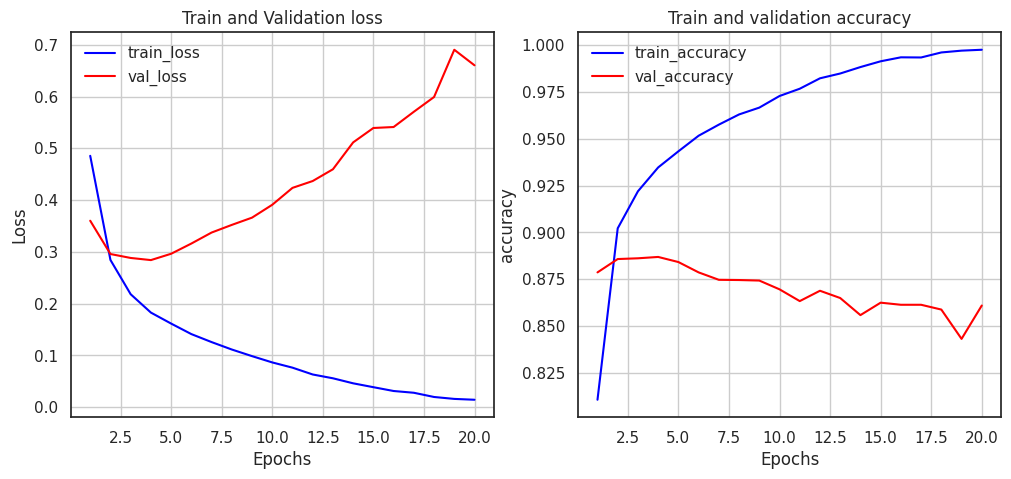

In [ ]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color = 'red', label='val_accuracy')
ax2.set_title('Train and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 노드09 : 모델 크기 조절과 규제

#### 09-01 모델 크기 조절

##### 데이터 로드 및 전처리

In [9]:
from keras.datasets import imdb
import numpy as np

def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data),dim))
  for i,d in enumerate(data):
    results[i,d] = 1.
  return results

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [10]:
train_data[:3] # 1, 14, 22는 이 데이터셋에서 정의된 언어/숫자 간의 벡터

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [11]:
train_labels[:3] # 1이 긍정적, 0이 부정적 리뷰?

array([1, 0, 0])

In [12]:
x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [14]:
x_train[:3] # 0,1 단위의 벡터로 변형!

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

##### 모델 구성 및 컴파일

In [23]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,), name='input')) # LMS는 input_shape
# https://discuss.ai.google.dev/t/userwarning-do-not-pass-an-input-shape-input-dim-argument-to-a-layer/68342
# model.add(layers.Input(shape=(10000,))) 이렇게 하면 warning은 안나옴
model.add(layers.Dense(128, activation='relu', name = 'hidden'))
model.add(layers.Dense(1, activation='sigmoid', name = 'output'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,296,769 (4.95 MB)

 Trainable params: 1,296,769 (4.95 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 9s 150ms/step - accuracy: 0.7074 - loss: 0.5546 - val_accuracy: 0.8692 - val_loss: 0.3266
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9020 - loss: 0.2583 - val_accuracy: 0.8786 - val_loss: 0.2955
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.9151 - loss: 0.2163 - val_accuracy: 0.8702 - val_loss: 0.3146
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9392 - loss: 0.1623 - val_accuracy: 0.8844 - val_loss: 0.2895
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9538 - loss: 0.1317 - val_accuracy: 0.8732 - val_loss: 0.3250
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9655 - loss: 0.1023 - val_accuracy: 0.8768 - val_loss: 0.3430
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9757 - loss: 0.0731 - val_accuracy: 0.8700 - val_loss: 0.3867
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9792 - loss: 0.0636 - val_accuracy: 0.8768 - 

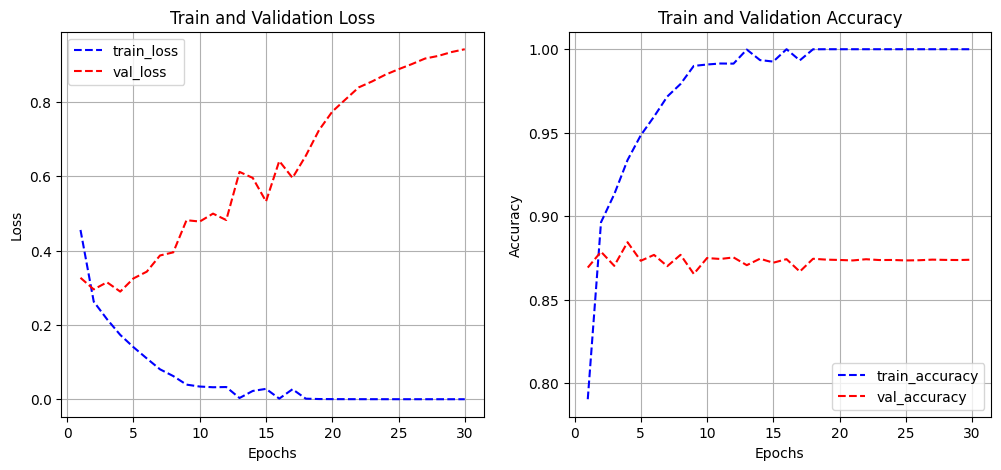

In [25]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

##### 모델 크기 증가
- dense layer 수를 128에서 2048로 크게 늘려보기

In [26]:
b_model = models.Sequential()
b_model.add(layers.Dense(2048, activation='relu', input_shape=(10000, ), name='input3'))
b_model.add(layers.Dense(2048, activation='relu', name='hidden3'))
b_model.add(layers.Dense(1, activation='sigmoid', name='output3'))
b_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
b_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input3 (Dense)                  │ (None, 2048)           │    20,482,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output3 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,680,449 (94.15 MB)

 Trainable params: 24,680,449 (94.15 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
b_model_history = b_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512,
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 10s 159ms/step - accuracy: 0.6252 - loss: 0.6872 - val_accuracy: 0.8637 - val_loss: 0.3423
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.8781 - loss: 0.2927 - val_accuracy: 0.8488 - val_loss: 0.3496
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.9103 - loss: 0.2184 - val_accuracy: 0.8868 - val_loss: 0.2752
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.9427 - loss: 0.1512 - val_accuracy: 0.8837 - val_loss: 0.2918
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9578 - loss: 0.1137 - val_accuracy: 0.8848 - val_loss: 0.3122
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9758 - loss: 0.0753 - val_accuracy: 0.8828 - val_loss: 0.3310
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.9893 - loss: 0.0423 - val_accuracy: 0.8825 - val_loss: 0.3965
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.9909 - loss: 0.0343 - val_accuracy: 0.8810 -

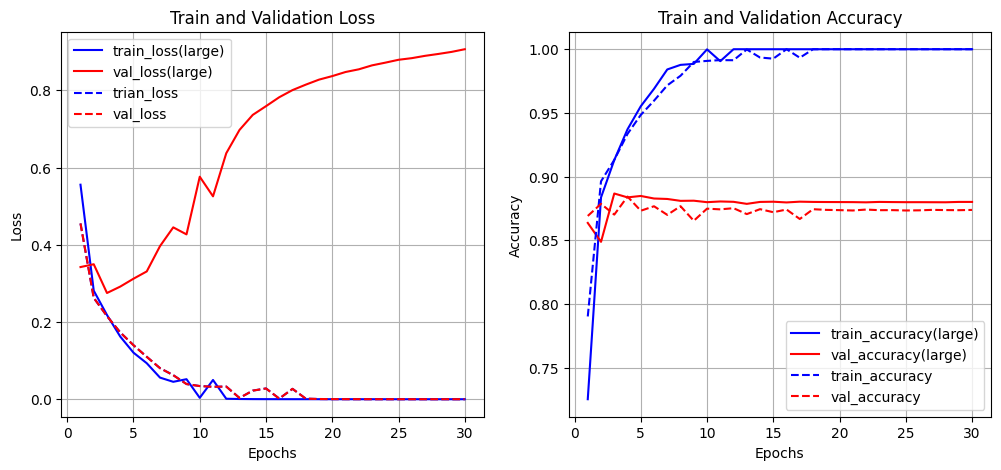

In [30]:
import matplotlib.pyplot as plt

b_history_dict = b_model_history.history

b_loss = b_history_dict['loss']
b_val_loss = b_history_dict['val_loss']
epochs = range(1,len(b_loss)+1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, b_loss, 'b-', label = 'train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label = 'val_loss(large)')
ax1.plot(epochs, loss, 'b--',label = 'trian_loss')
ax1.plot(epochs, loss, 'r--', label = 'val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

b_accuracy = b_history_dict['accuracy']
b_val_accuracy = b_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

##### 모델 크기 감소

In [31]:
s_model = models.Sequential()
s_model.add(layers.Dense(16, activation='relu', input_shape=(10000, ), name='input2'))
s_model.add(layers.Dense(16, activation='relu', name='hidden2'))
s_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
s_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
s_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input2 (Dense)                  │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
s_model_history = s_model.fit(x_train, y_train,
                              epochs=30,
                              batch_size=512,
                              validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.7396 - loss: 0.5575 - val_accuracy: 0.8788 - val_loss: 0.3413
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.8991 - loss: 0.2884 - val_accuracy: 0.8888 - val_loss: 0.2848
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9261 - loss: 0.2105 - val_accuracy: 0.8877 - val_loss: 0.2811
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9386 - loss: 0.1782 - val_accuracy: 0.8870 - val_loss: 0.2849
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9473 - loss: 0.1521 - val_accuracy: 0.8812 - val_loss: 0.3033
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9525 - loss: 0.1357 - val_accuracy: 0.8798 - val_loss: 0.3124
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9602 - loss: 0.1203 - val_accuracy: 0.8673 - val_loss: 0.3632
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9635 - loss: 0.1108 - val_accuracy: 0.8552 - v

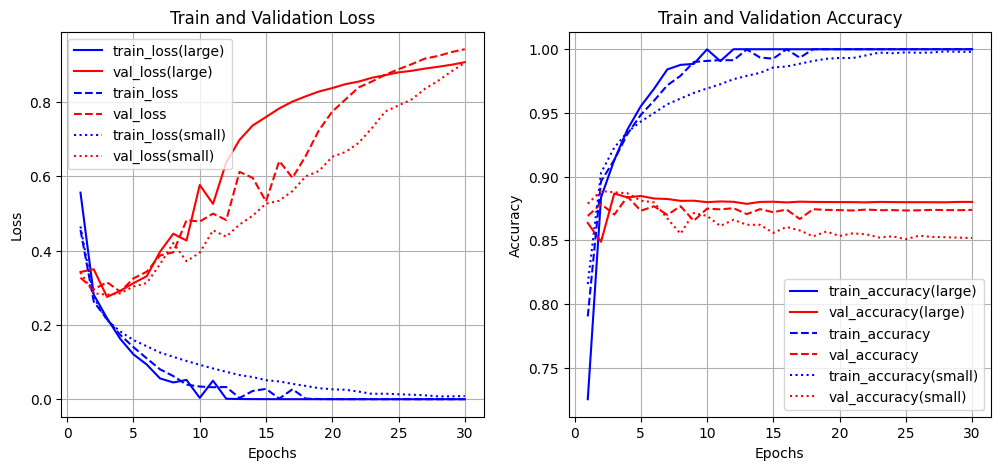

In [33]:
s_history_dict = s_model_history.history

s_loss = s_history_dict['loss']
s_val_loss = s_history_dict['val_loss']
epochs = range(1, len(s_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, s_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, s_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

s_accuracy = s_history_dict['accuracy']
s_val_accuracy = s_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

##### 모델 크기 조절해보기

In [36]:
# [play ground]
# 원하는 분은 Dense층을 늘리거나 줄이는 등 모델의 구조 역시 변경해보시기 바랍니다.
# 16, 16 대신 -> 32, 64 / epoch 30 : accuracy: 0.9987 - loss: 0.0045 - val_accuracy: 0.8604 - val_loss: 0.9656
# 32, 32로 변경? /

your_model = models.Sequential()
your_model.add(layers.Dense(32, activation='relu', input_shape=(10000, ), name='input2'))
your_model.add(layers.Dense(32, activation='relu', name='hidden2'))
your_model.add(layers.Dense(1, activation='sigmoid', name='output2'))
your_model.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])
your_model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input2 (Dense)                  │ (None, 32)             │       320,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 321,121 (1.22 MB)

 Trainable params: 321,121 (1.22 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
your_model_history = your_model.fit(x_train, y_train, epochs=30, batch_size=512,  validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 110ms/step - accuracy: 0.7341 - loss: 0.5451 - val_accuracy: 0.8606 - val_loss: 0.3487
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9016 - loss: 0.2743 - val_accuracy: 0.8796 - val_loss: 0.2978
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.9245 - loss: 0.2063 - val_accuracy: 0.8566 - val_loss: 0.3524
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9308 - loss: 0.1828 - val_accuracy: 0.8838 - val_loss: 0.2932
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9496 - loss: 0.1467 - val_accuracy: 0.8803 - val_loss: 0.3073
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9523 - loss: 0.1339 - val_accuracy: 0.8684 - val_loss: 0.3540
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9584 - loss: 0.1186 - val_accuracy: 0.8701 - val_loss: 0.3616
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9700 - loss: 0.0941 - val_accuracy: 0.8685 - 

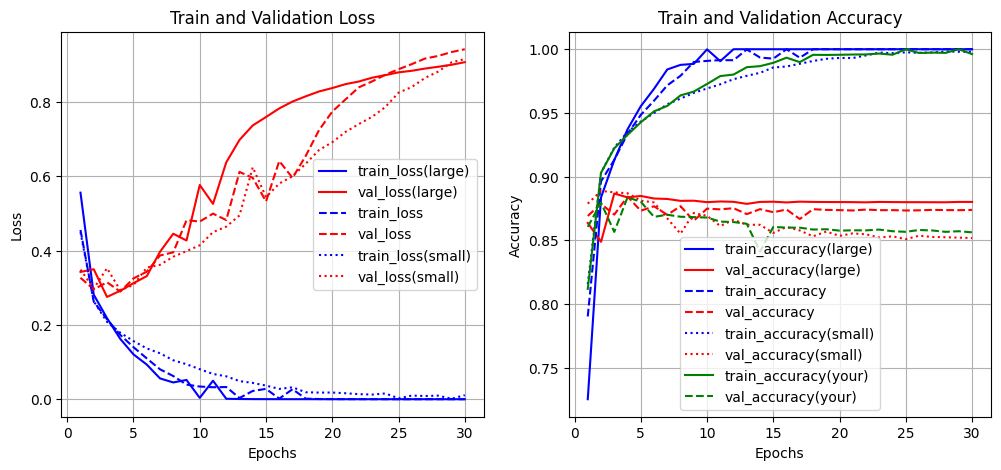

In [38]:
your_history_dict = your_model_history.history

your_loss = your_history_dict['loss']
your_val_loss = your_history_dict['val_loss']
epochs = range(1, len(your_loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, b_loss, 'b-', label='train_loss(large)')
ax1.plot(epochs, b_val_loss, 'r-', label='val_loss(large)')
ax1.plot(epochs, loss, 'b--', label='train_loss')
ax1.plot(epochs, val_loss, 'r--', label='val_loss')
ax1.plot(epochs, your_loss, 'b:', label='train_loss(small)')
ax1.plot(epochs, your_val_loss, 'r:', label='val_loss(small)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

your_accuracy = your_history_dict['accuracy']
your_val_accuracy = your_history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, b_accuracy, 'b-', label='train_accuracy(large)')
ax2.plot(epochs, b_val_accuracy, 'r-', label='val_accuracy(large)')
ax2.plot(epochs, accuracy, 'b--', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r--', label='val_accuracy')
ax2.plot(epochs, s_accuracy, 'b:', label='train_accuracy(small)')
ax2.plot(epochs, s_val_accuracy, 'r:', label='val_accuracy(small)')
ax2.plot(epochs, your_accuracy, 'g-', label='train_accuracy(your)')
ax2.plot(epochs, your_val_accuracy, 'g--', label='val_accuracy(your)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 09-02 규제
- 가중치의 파라미터 값이 커서 과대적합이 발생하는 경우가 많기 때문에 이를 방지하기 위해 큰 가중치 값은 큰 규제를 가하는 방법이 규제화
-  L1 규제는 가중치의 절댓값에 비례하고, L2 규제는 가중치 감쇠(weight decay)라고도 불리며, 가중치의 제곱에 비례

##### L1 규제

In [39]:
l1_model =  models.Sequential()
l1_model.add(layers.Dense(16,
                          kernel_regularizer='l1',
                          activation='relu',
                          input_shape=(10000, )))
l1_model.add(layers.Dense(16,
                          kernel_regularizer='l1',
                          activation='relu'))
l1_model.add(layers.Dense(1, activation='sigmoid'))
l1_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l1_model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
l1_model_hist = l1_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.5428 - loss: 7.1433 - val_accuracy: 0.6269 - val_loss: 1.9211
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.6501 - loss: 1.8791 - val_accuracy: 0.7144 - val_loss: 1.7838
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6927 - loss: 1.7692 - val_accuracy: 0.7125 - val_loss: 1.7096
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.7128 - loss: 1.6792 - val_accuracy: 0.7350 - val_loss: 1.6056
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7376 - loss: 1.5962 - val_accuracy: 0.7417 - val_loss: 1.5525
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7590 - loss: 1.5269 - val_accuracy: 0.7606 - val_loss: 1.4758
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7755 - loss: 1.4685 - val_accuracy: 0.7830 - val_loss: 1.4441
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - accuracy: 0.7916 - loss: 1.4251 - val_accuracy: 0.7961 - 

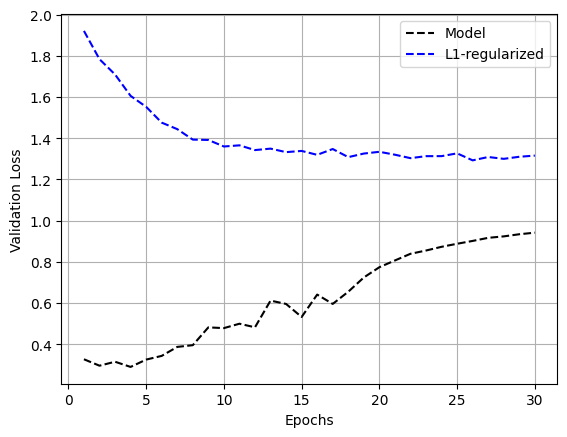

In [41]:
l1_val_loss = l1_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

##### L2 규제

In [42]:
l2_model =  models.Sequential()
l2_model.add(layers.Dense(16,
                          kernel_regularizer='l2',
                          activation='relu',
                          input_shape=(10000, )))
l2_model.add(layers.Dense(16,
                          kernel_regularizer='l2',
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
l2_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=30,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 146ms/step - accuracy: 0.7307 - loss: 0.8771 - val_accuracy: 0.8432 - val_loss: 0.5838
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8811 - loss: 0.5304 - val_accuracy: 0.8802 - val_loss: 0.4994
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8933 - loss: 0.4707 - val_accuracy: 0.8771 - val_loss: 0.4751
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9012 - loss: 0.4326 - val_accuracy: 0.8766 - val_loss: 0.4585
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8998 - loss: 0.4165 - val_accuracy: 0.8769 - val_loss: 0.4413
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy: 0.9003 - loss: 0.4027 - val_accuracy: 0.8775 - val_loss: 0.4361
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9076 - loss: 0.3865 - val_accuracy: 0.8814 - val_loss: 0.4227
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9061 - loss: 0.3806 - val_accuracy: 0.8819 - 

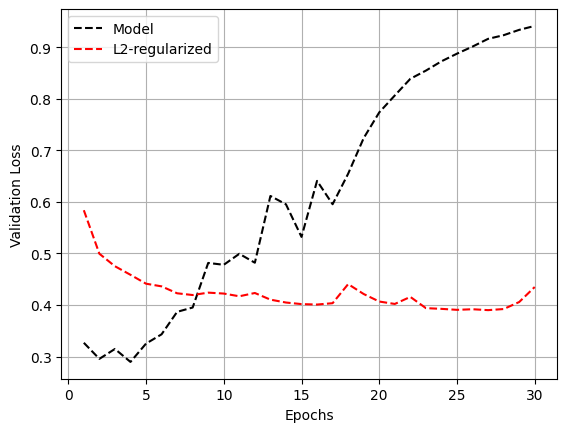

In [44]:
l2_val_loss = l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

##### L1, L2 규제
- 케라스에서 L1과 L2 규제를 같이 사용하기 위해서는 적용할 레이어에서 kernel_regularizer를 l1_l2로 지정

In [52]:
from tensorflow.keras import models, layers, regularizers

l1_l2_model =  models.Sequential()
# LMS에서는 'l1_l2' 되지만, 요즘 버전에서는 명시적으로 넣어야
# l1_l2_model.add(layers.Dense(16,
#                              kernel_regularizer='l1_l2',
#                              activation='relu', input_shape=(10000, )))
# l1_l2_model.add(layers.Dense(16,
#                              kernel_regularizer='l1_l2',
#                              activation='relu'))
l1_l2_model.add(layers.Dense(16,
                             kernel_regularizer = regularizers.l1_l2(l1=0.01,l2=0.01),
                             activation = 'relu', input_shape = (10000,)))
l1_l2_model.add(layers.Dense(16,
                             kernel_regularizer = regularizers.l1_l2(l1=0.01,l2=0.01),
                             activation = 'relu'))

l1_l2_model.add(layers.Dense(1, activation='sigmoid'))
l1_l2_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
l1_l2_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
l1_l2_model_hist = l1_l2_model.fit(x_train, y_train,
                                  epochs=30,
                                  batch_size=512,
                                  validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.5258 - loss: 7.3885 - val_accuracy: 0.6339 - val_loss: 2.0375
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.6050 - loss: 1.9847 - val_accuracy: 0.6474 - val_loss: 1.8667
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6538 - loss: 1.8458 - val_accuracy: 0.6548 - val_loss: 1.7650
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.6679 - loss: 1.7327 - val_accuracy: 0.6779 - val_loss: 1.6535
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6710 - loss: 1.6424 - val_accuracy: 0.6879 - val_loss: 1.5988
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6936 - loss: 1.5776 - val_accuracy: 0.7099 - val_loss: 1.5322
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7178 - loss: 1.5264 - val_accuracy: 0.7379 - val_loss: 1.5002
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7410 - loss: 1.4871 - val_accuracy: 0.7546 - 

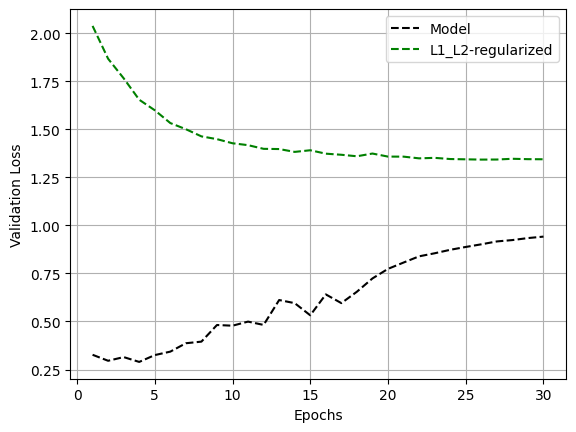

In [55]:
l1_l2_val_loss = l1_l2_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

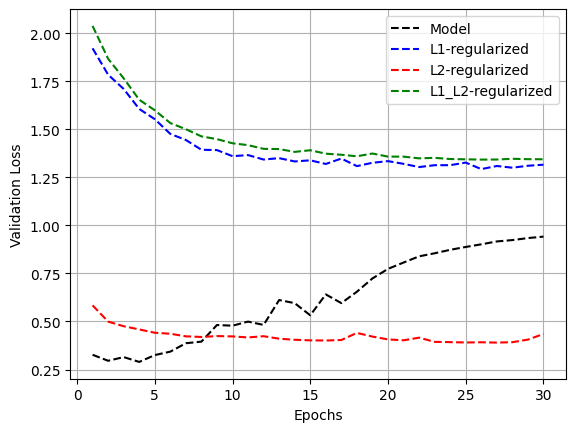

In [56]:
epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

##### playground
- L2 규제를 쓴다고 해도 kerner_regularizer 부분 하이퍼파라미터 조정해보기
- 기본값 0.01

In [59]:
# [play ground]
# L2 규제의 기본 값은 0.01입니다. 여러분이 원하는 크기로 조절해보세요. 혹은 다른 규제를 사용하셔도 됩니다.
from tensorflow.keras import models, layers, regularizers

your_model =  models.Sequential()
your_model.add(layers.Dense(16,
                            kernel_regularizer=regularizers.l2(l2=0.001),
                            activation='relu', input_shape=(10000, )))
your_model.add(layers.Dense(16,
                            kernel_regularizer=regularizers.l2(l2=0.001),
                            activation='relu'))
your_model.add(layers.Dense(1, activation='sigmoid'))
your_model.compile(optimizer='rmsprop',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])
your_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
your_model_hist = your_model.fit(x_train, y_train,
                                 epochs=30,
                                 batch_size=512,
                                 validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.7270 - loss: 0.6196 - val_accuracy: 0.8246 - val_loss: 0.4516
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8953 - loss: 0.3540 - val_accuracy: 0.8830 - val_loss: 0.3472
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9195 - loss: 0.2800 - val_accuracy: 0.8897 - val_loss: 0.3268
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9303 - loss: 0.2491 - val_accuracy: 0.8829 - val_loss: 0.3422
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9369 - loss: 0.2326 - val_accuracy: 0.8848 - val_loss: 0.3352
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9409 - loss: 0.2234 - val_accuracy: 0.8825 - val_loss: 0.3481
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9447 - loss: 0.2130 - val_accuracy: 0.8804 - val_loss: 0.3520
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9491 - loss: 0.2045 - val_accuracy: 0.8800 - 

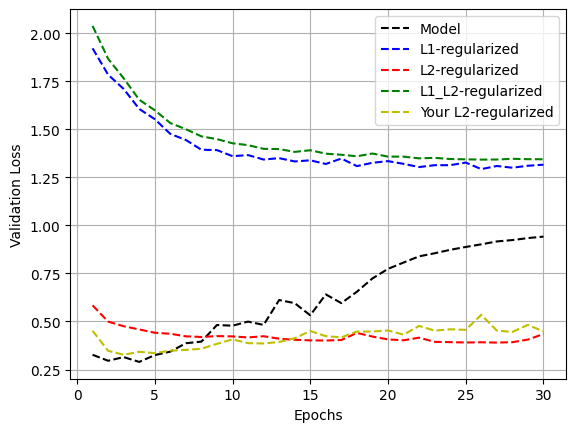

In [61]:
your_val_loss = your_model_hist.history['val_loss']

epochs = range(1, 31)
plt.plot(epochs, val_loss, 'k--', label='Model')
plt.plot(epochs, l1_val_loss, 'b--', label='L1-regularized')
plt.plot(epochs, l2_val_loss, 'r--', label='L2-regularized')
plt.plot(epochs, l1_l2_val_loss, 'g--', label='L1_L2-regularized')
plt.plot(epochs, your_val_loss, 'y--', label='Your L2-regularized')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid()
plt.show()

#### 09-03 드롭아웃
- 모델 과대적합 방지 위해 일부 노드만 학습에 활용

###### 드롭아웃 20%

In [62]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
drop_20_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 8s 115ms/step - accuracy: 0.6950 - loss: 0.5843 - val_accuracy: 0.8681 - val_loss: 0.3688
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.8731 - loss: 0.3471 - val_accuracy: 0.8867 - val_loss: 0.2960
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9057 - loss: 0.2634 - val_accuracy: 0.8865 - val_loss: 0.2835
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9263 - loss: 0.2069 - val_accuracy: 0.8886 - val_loss: 0.2751
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.9374 - loss: 0.1784 - val_accuracy: 0.8859 - val_loss: 0.2858
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.9471 - loss: 0.1495 - val_accuracy: 0.8784 - val_loss: 0.3060
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9535 - loss: 0.1368 - val_accuracy: 0.8746 - val_loss: 0.3424
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9618 - loss: 0.1153 - val_accuracy: 0.8791 - 

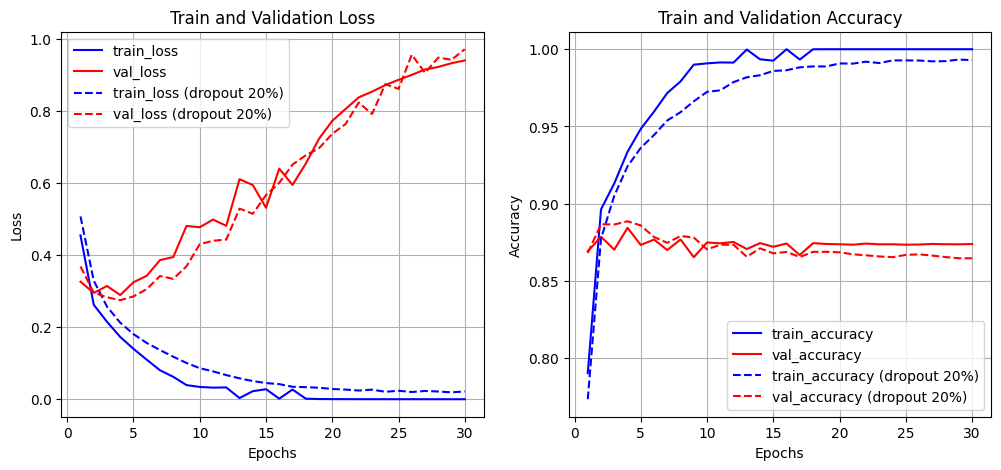

In [64]:
drop_20_dict = drop_20_history.history

drop_20_loss = drop_20_dict['loss']
drop_20_val_loss = drop_20_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_20_accuracy = drop_20_dict['accuracy']
drop_20_val_accuracy = drop_20_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

##### 드롭아웃 50%

In [65]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [66]:
drop_50_history = model.fit(x_train, y_train,
                            epochs=30,
                            batch_size=512,
                            validation_data=(x_test, y_test))

Epoch 1/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 104ms/step - accuracy: 0.6036 - loss: 0.6472 - val_accuracy: 0.8641 - val_loss: 0.4839
Epoch 2/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7874 - loss: 0.4952 - val_accuracy: 0.8756 - val_loss: 0.3768
Epoch 3/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8542 - loss: 0.3905 - val_accuracy: 0.8868 - val_loss: 0.3202
Epoch 4/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8939 - loss: 0.3252 - val_accuracy: 0.8874 - val_loss: 0.2973
Epoch 5/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9084 - loss: 0.2903 - val_accuracy: 0.8883 - val_loss: 0.2886
Epoch 6/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9210 - loss: 0.2505 - val_accuracy: 0.8793 - val_loss: 0.2921
Epoch 7/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9327 - loss: 0.2188 - val_accuracy: 0.8778 - val_loss: 0.2952
Epoch 8/30
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9351 - loss: 0.2074 - val_accuracy: 0.8848 - 

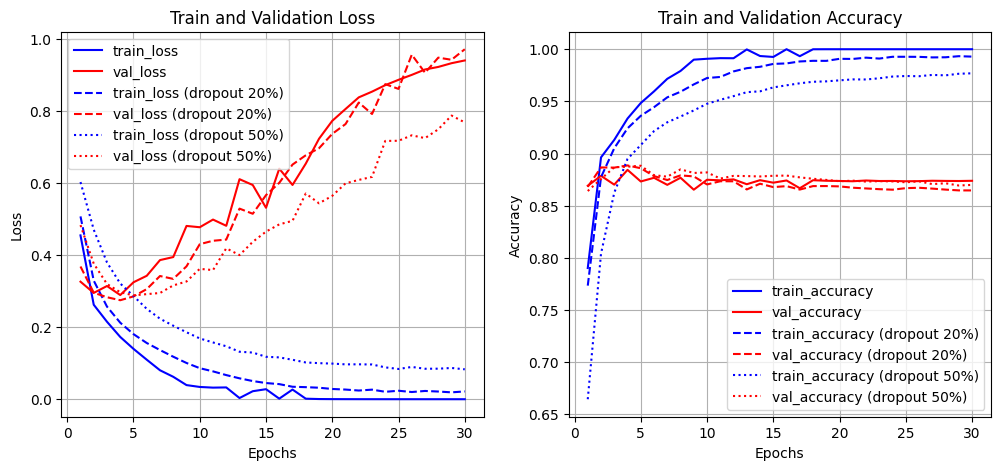

In [68]:
drop_50_dict = drop_50_history.history

drop_50_loss = drop_50_dict['loss']
drop_50_val_loss = drop_50_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.plot(epochs, drop_20_loss, 'b--', label='train_loss (dropout 20%)')
ax1.plot(epochs, drop_20_val_loss, 'r--', label='val_loss (dropout 20%)')
ax1.plot(epochs, drop_50_loss, 'b:', label='train_loss (dropout 50%)')
ax1.plot(epochs, drop_50_val_loss, 'r:', label='val_loss (dropout 50%)')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

drop_50_accuracy = drop_50_dict['accuracy']
drop_50_val_accuracy = drop_50_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.plot(epochs, drop_20_accuracy, 'b--', label='train_accuracy (dropout 20%)')
ax2.plot(epochs, drop_20_val_accuracy, 'r--', label='val_accuracy (dropout 20%)')
ax2.plot(epochs, drop_50_accuracy, 'b:', label='train_accuracy (dropout 50%)')
ax2.plot(epochs, drop_50_val_accuracy, 'r:', label='val_accuracy (dropout 50%)')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

### 10 가중치 초기화, 배치 정규화
- 가중치 초기화는 신경망 성능에 큰 영향을 줌
- 만약 가중치의 값이 일부 값으로 치우치게 되면, 활성화 함수를 통과한 값들도 치우치게 되고,    
결국 표현할 수 있는 신경망의 수가 적어지는 문제가 발생
- 보통 가중치 초기값으로 0에 가까운 무작위 값을 사용하더라도 초기값에 따라서 모델의 성능 차이가 발생
- 즉, 모델의 활성화 값이 골고루 분포 되는 것이 중요

#### 10-01 가중치 초기화

##### build_model정의

In [108]:
from tensorflow.keras import models, layers, optimizers

def build_model(activation, initializer):
  model = models.Sequential()
  model.add(layers.Input(shape=(400, 20), name='input'))
  model.add(layers.Dense(20, activation=activation, name='hidden1',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden2',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden3',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden4',
                        kernel_initializer=initializer))
  model.add(layers.Dense(20, activation=activation, name='hidden5',
                        kernel_initializer=initializer))
  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=optimizers.SGD(),
                metrics=['accuracy'])
  return model

In [109]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
# plt.style.use('seaborn-white') # LMS는 이렇게 쓰지만 요샌 다르게 씀

def show_layer(model):
  # input = np.random.randn(400, 20) # LMS는 이렇게 사용
  input = tf.convert_to_tensor(np.random.randn(400, 20), dtype=tf.float32)

  plt.figure(figsize=(18, 3)) # (12,6)에서 변경
  colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'] # 요샌 명시적으로 지정해줘야함!
  # Matplotlib 3.5 이상 부터는 subplot 색상 공유됨!

  for i in range(1, 6):
    name = 'hidden' + str(i) # LMS에서 이렇게 씀
    # name = f'hidden{i}'
    layer = model.get_layer(name)
    input = layer(input)
    plt.subplot(1, 6, i)
    plt.title(name)
    # plt.hist(input, 20, range=(-1, 1)) # LMS에서 이렇게 씀
    plt.hist(input.numpy().flatten(), 20, range=(-1, 1),color=colors[i-1])
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
  plt.show()

##### 선형 함수 가중치 초기화

###### 제로 초기화

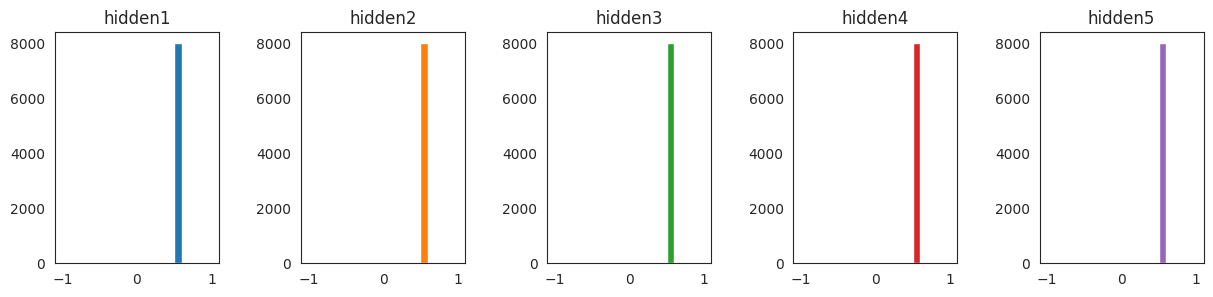

In [110]:
from tensorflow.keras import initializers, activations

model = build_model(activations.sigmoid, initializers.Zeros())
show_layer(model)

###### 정규분포 초기화

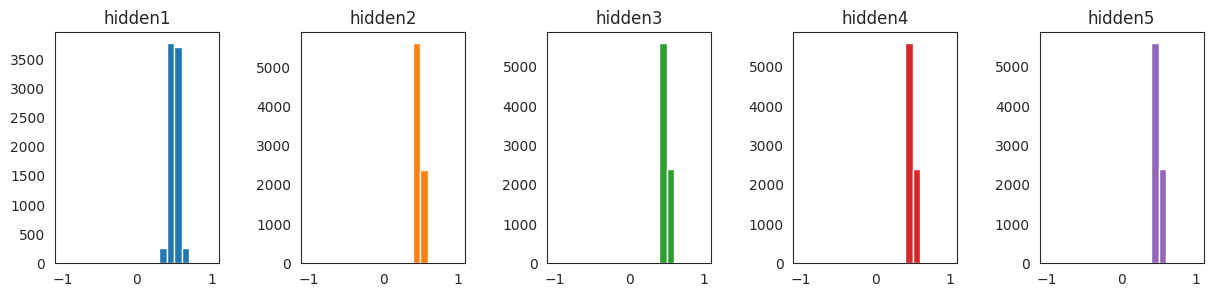

In [111]:
model = build_model(activations.sigmoid, initializers.RandomNormal())
show_layer(model)

###### 균일분포 정규화

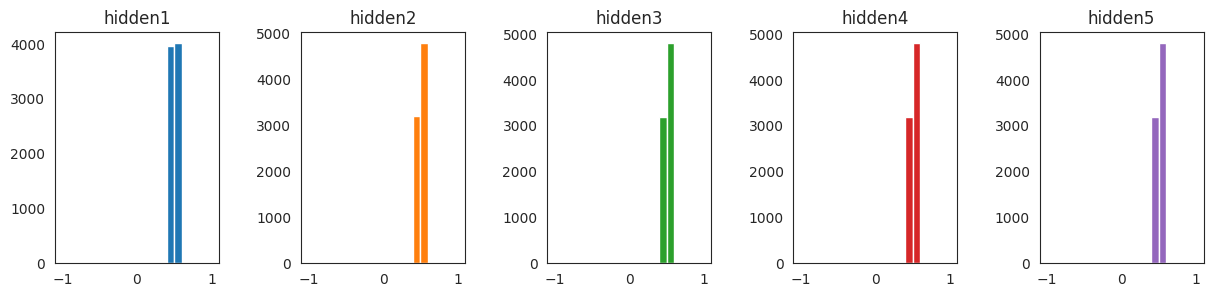

In [112]:
model = build_model(activations.sigmoid, initializers.RandomUniform())
show_layer(model)

###### Xavier(Glorot) 정규분포 초기화
- 은닉노드 수가 n개면, 표준편차는 1/sqrt(n)인 분포로 초기화

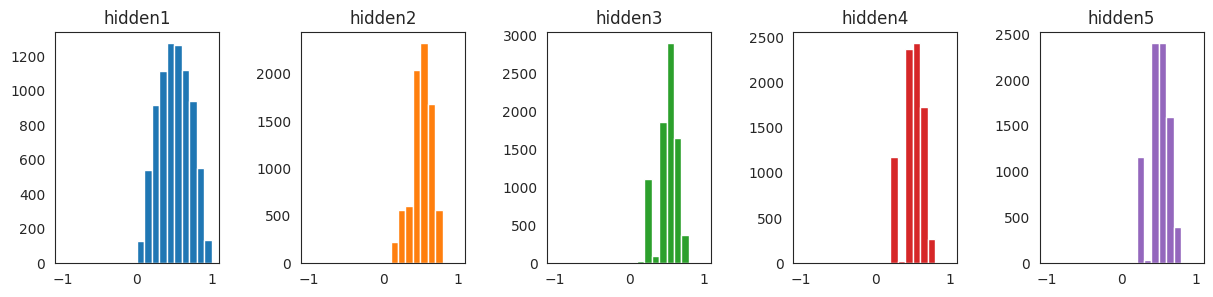

In [113]:
model = build_model(activations.sigmoid, initializers.GlorotNormal())
show_layer(model)

###### Xavier(Glorot) 균일분포 초기화

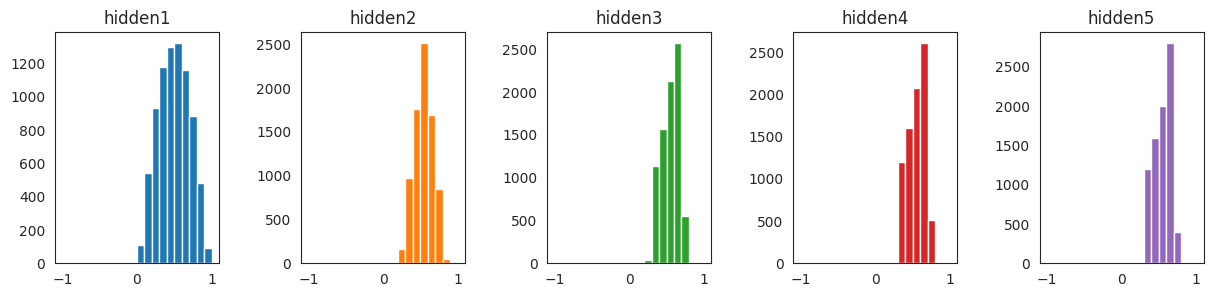

In [114]:
model = build_model(activations.sigmoid, initializers.GlorotUniform())
show_layer(model)

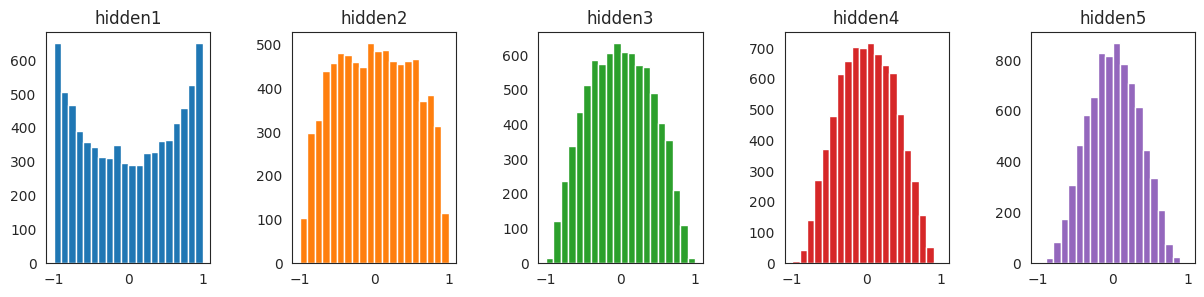

In [115]:
# 활성화 함수를 sigmoid 대신 tanh를 적용한 결과, 좀 더 균일한 분포의 모습을 보이는 것을 확인
model = build_model(activations.tanh, initializers.GlorotUniform())
show_layer(model)

###### He정규분포 초기화
- 노드 n개면, sqrt(2/n)인 표준편차를 가지는 분포로 정규화

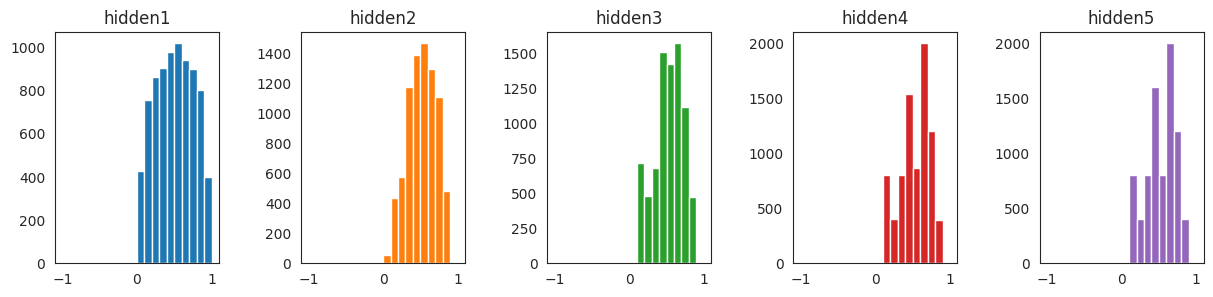

In [116]:
model = build_model(activations.sigmoid, initializers.HeNormal())
show_layer(model)

###### He균일분포 초기화

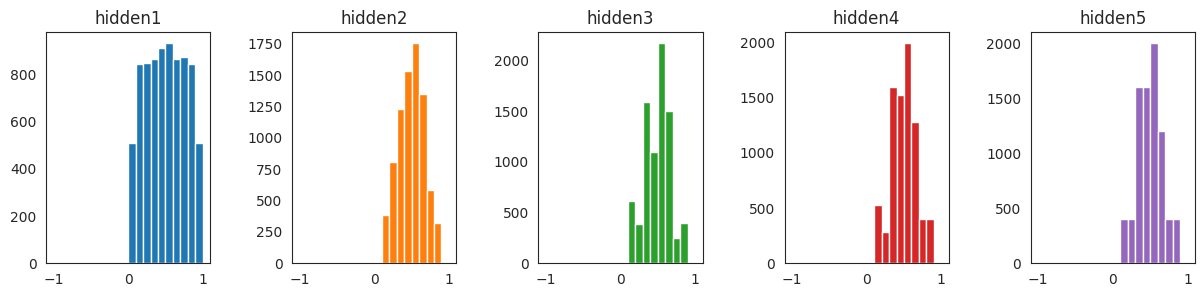

In [117]:
model = build_model(activations.sigmoid, initializers.HeUniform())
show_layer(model)

##### 비선형 함수 가중치 초기화
- 대표적 비선형 함수인 relu를 사용

###### 제로 초기화

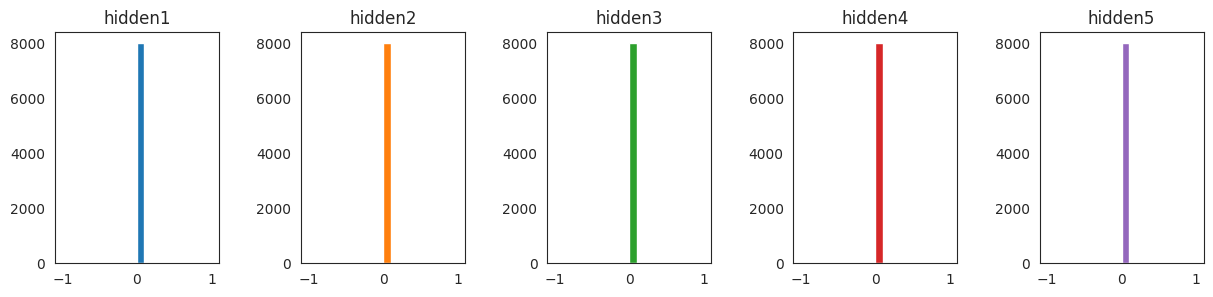

In [118]:
model = build_model(activations.relu, initializers.Zeros())
show_layer(model)

###### 정규분포초기화

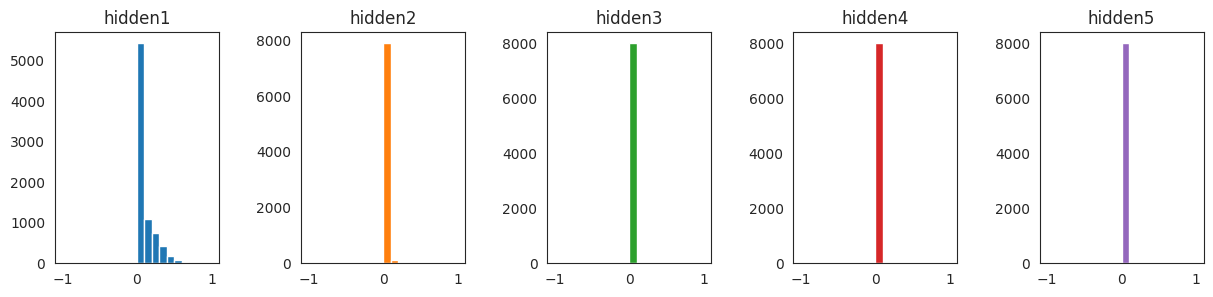

In [119]:
model = build_model(activations.relu, initializers.RandomNormal())
show_layer(model)

###### 균일분포 정규화

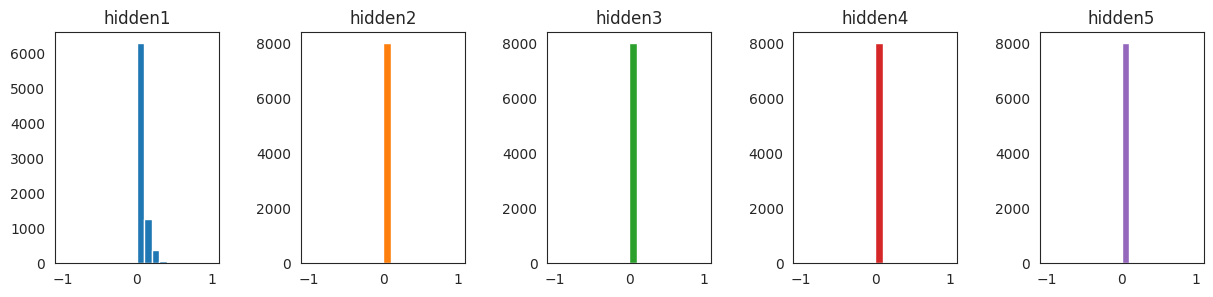

In [120]:
model = build_model(activations.relu, initializers.RandomUniform())
show_layer(model)

###### Xavier(Glorot) 정규분포 초기화

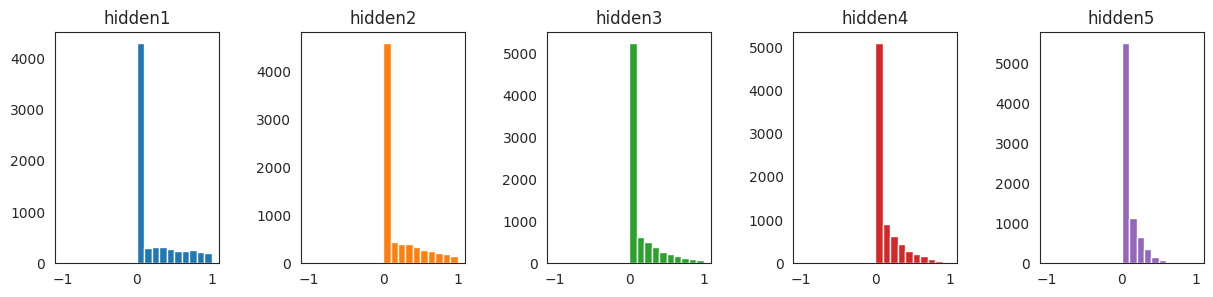

In [121]:
model = build_model(activations.relu, initializers.GlorotNormal())
show_layer(model)

###### Xavier(Glorot) 균일분포 초기화

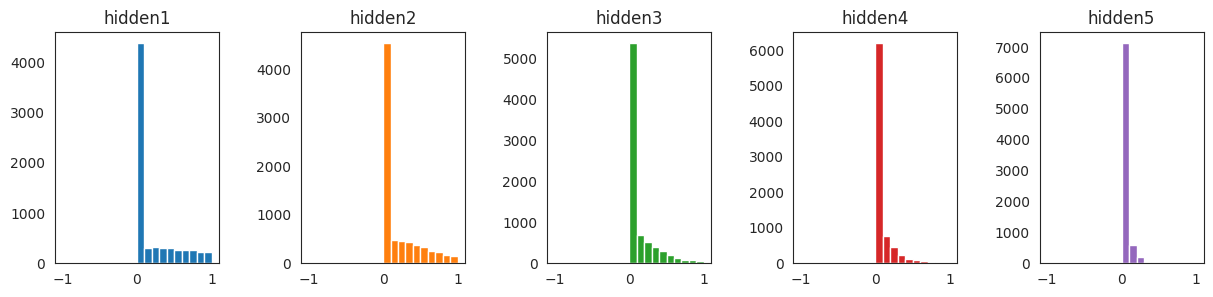

In [122]:
model = build_model(activations.relu, initializers.GlorotUniform())
show_layer(model)

###### He 정규분포 초기화

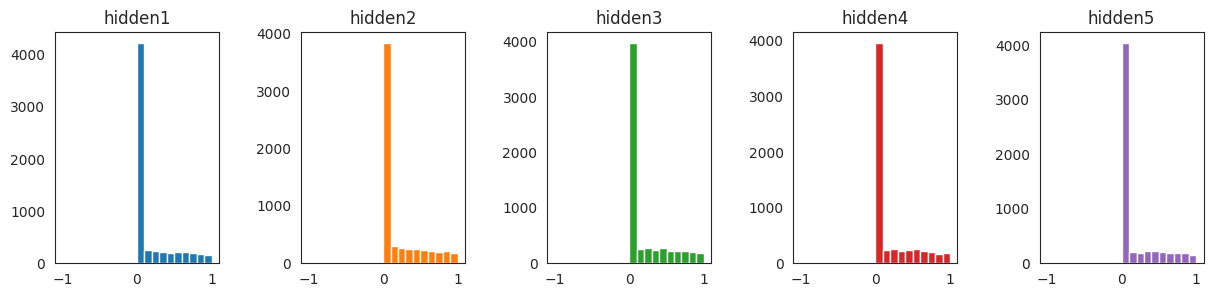

In [123]:
model = build_model(activations.relu, initializers.HeNormal())
show_layer(model)

###### He 균일분포 초기화





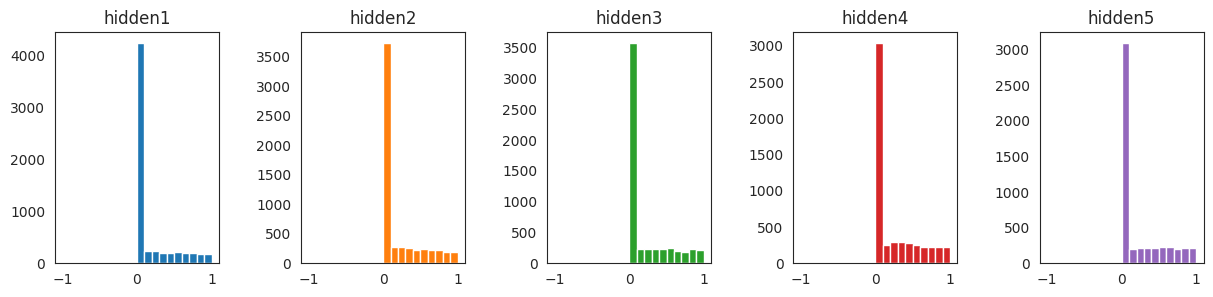

In [124]:
model = build_model(activations.relu, initializers.HeUniform())
show_layer(model)

#### 10-02 Reuters 딥러닝 모델 예제

##### 데이터 전처리 및 로드

In [125]:
from keras.datasets import reuters
import numpy as np

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(len(train_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
8982
2246
46


In [126]:
word_index = reuters.get_word_index()
# word_index

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [127]:
index_word = dict([(value, key) for (key, value) in word_index.items()])
# index_word

In [128]:
# train_data[0]의 각 인덱스에 매핑되는 단어들로 연결하여 하나의 리뷰를 만들어 줍니다.
news = ' '.join([str(i) for i in train_data[0]])
news

'1 2 2 8 43 10 447 5 25 207 270 5 3095 111 16 369 186 90 67 7 89 5 19 102 6 19 124 15 90 67 84 22 482 26 7 48 4 49 8 864 39 209 154 6 151 6 83 11 15 22 155 11 15 7 48 9 4579 1005 504 6 258 6 272 11 15 22 134 44 11 15 16 8 197 1245 90 67 52 29 209 30 32 132 6 109 15 17 12'

In [129]:
news = ' '.join([index_word.get(i-3, '?') for i in train_data[0]])
news

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [130]:
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [131]:
# Reuters 데이터셋에서 레이블은 46개의 주제를 구분하기 위한 인덱스
print(train_labels[5])
print(train_labels[15])
print(train_labels[25])
print(train_labels[35])
print(train_labels[45])

4
8
1
4
20


In [132]:
# 뉴스 주제인 레이블도 원-핫 인코딩(범주형 인코딩)을 이용해 변환을 수행해 주어야 합니다.
# 케라스에서는 utils.to_categorical()을 이용해 쉽게 변환할 수 있습니다.

from tensorflow.keras import utils

y_train = utils.to_categorical(train_labels)
y_test = utils.to_categorical(test_labels)

print(train_labels[5], y_train[5])
print(train_labels[15], y_train[15])
print(train_labels[25], y_train[25])

4 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
8 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
1 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


##### 모델 구성

In [133]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.Dense(46, activation='softmax', name='output'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### 모델 컴파일 및 학습

In [134]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_55"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,302,574 (4.97 MB)

 Trainable params: 1,302,574 (4.97 MB)

 Non-trainable params: 0 (0.00 B)

In [135]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - accuracy: 0.4584 - loss: 2.8169 - val_accuracy: 0.6683 - val_loss: 1.5015
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7091 - loss: 1.2917 - val_accuracy: 0.7226 - val_loss: 1.2236
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.7889 - loss: 0.9583 - val_accuracy: 0.7311 - val_loss: 1.1510
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8358 - loss: 0.7493 - val_accuracy: 0.7725 - val_loss: 0.9857
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8774 - loss: 0.5746 - val_accuracy: 0.7845 - val_loss: 0.9368
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9031 - loss: 0.4597 - val_accuracy: 0.8028 - val_loss: 0.8779
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9233 - loss: 0.3610 - val_accuracy: 0.8019 - val_loss: 0.8744
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9303 - loss: 0.3116 - val_accuracy: 0.8112 - 

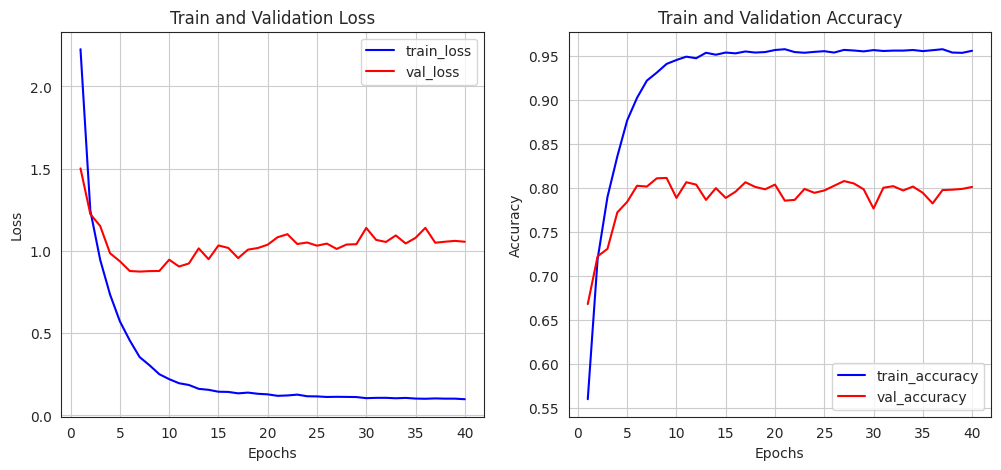

In [136]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='red', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, color='blue', label='train_accuracy')
ax2.plot(epochs, val_accuracy, color='red', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

##### 가중치 초기화

###### 함수 정의
- 초기화 initializer에 따라 모델을 생성하는 build_model 함수를 정의
- 모델의 학습 히스토리 결과를 비교해보기 위해서 시각화하는 diff_history 함수를 정의

In [137]:
def build_model(initializer):
  model = models.Sequential()
  model.add(layers.Dense(128,
                         activation='relu',
                         kernel_initializer=initializer,
                         input_shape=(10000, ),
                         name='input'))
  model.add(layers.Dense(128,
                         activation='relu',
                         kernel_initializer=initializer,
                         name='hidden'))
  model.add(layers.Dense(46,
                         activation='softmax',
                         name='output'))
  model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_test, y_test))
  return history

In [138]:
def diff_history(history1, history2):
  history1_dict = history1.history
  h1_loss = history1_dict['loss']
  h1_val_loss = history1_dict['val_loss']

  history2_dict = history2.history
  h2_loss = history2_dict['loss']
  h2_val_loss = history2_dict['val_loss']

  epochs = range(1, len(h1_loss) + 1)
  fig = plt.figure(figsize=(12, 5))
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  ax1 = fig.add_subplot(1, 2, 1)
  ax1.plot(epochs, h1_loss, 'b-', label='train_loss')
  ax1.plot(epochs, h1_val_loss, 'r-', label='val_loss')
  ax1.plot(epochs, h2_loss, 'b--', label='train_loss')
  ax1.plot(epochs, h2_val_loss, 'r--', label='val_loss')
  ax1.set_title('Train and Validation Loss')
  ax1.set_xlabel('Epochs')
  ax1.set_ylabel('Loss')
  ax1.grid()
  ax1.legend()

  h1_accuracy = history1_dict['accuracy']
  h1_val_accuracy = history1_dict['val_accuracy']

  h2_accuracy = history2_dict['accuracy']
  h2_val_accuracy = history2_dict['val_accuracy']

  ax2 = fig.add_subplot(1, 2, 2)
  ax2.plot(epochs, h1_accuracy, 'b-', label='train_accuracy')
  ax2.plot(epochs, h1_val_accuracy, 'r-', label='val_accuracy')
  ax2.plot(epochs, h2_accuracy, 'b--', label='train_accuracy')
  ax2.plot(epochs, h2_val_accuracy, 'r--', label='val_accuracy')
  ax2.set_title('Train and Validation Accuracy')
  ax2.set_xlabel('Epochs')
  ax2.set_ylabel('Accuracy')
  ax2.grid()
  ax2.legend()

  plt.show()

###### 제로 초기화

In [139]:
zero_history = build_model(initializers.Zeros())

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.1310 - loss: 3.8175 - val_accuracy: 0.0467 - val_loss: 3.7956
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.1315 - loss: 3.7893 - val_accuracy: 0.3620 - val_loss: 3.7726
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.3580 - loss: 3.7658 - val_accuracy: 0.3620 - val_loss: 3.7506
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.3515 - loss: 3.7439 - val_accuracy: 0.3620 - val_loss: 3.7286
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3351 - loss: 3.7216 - val_accuracy: 0.3620 - val_loss: 3.7070
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3524 - loss: 3.6998 - val_accuracy: 0.3620 - val_loss: 3.6856
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3584 - loss: 3.6785 - val_accuracy: 0.3620 - val_loss: 3.6642
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3182 - loss: 3.6555 - val_accuracy: 0.3620 - v

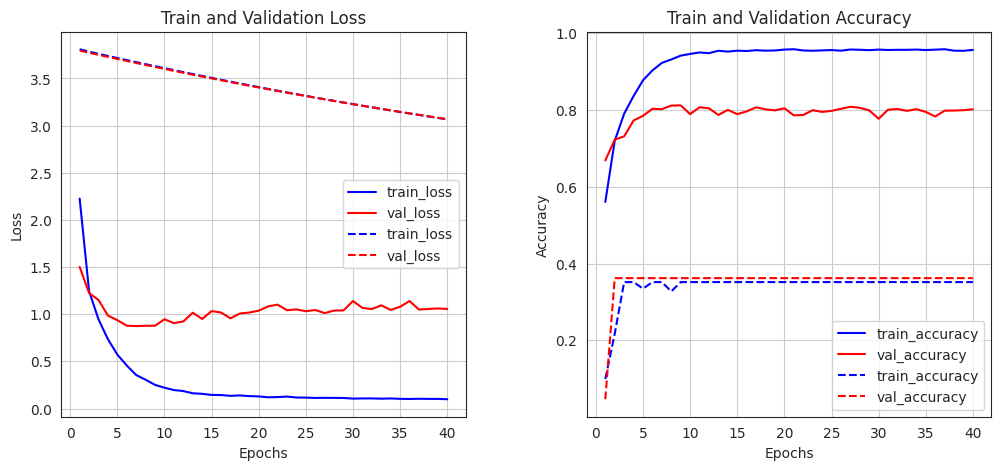

In [140]:
# 제로 초기화 모델은 제대로 학습 안되는 것 확인 가능!
diff_history(history, zero_history)

###### 정규분포 초기화

In [141]:
normal_history = build_model(initializers.RandomNormal())

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.4020 - loss: 2.9251 - val_accuracy: 0.5984 - val_loss: 1.6882
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6424 - loss: 1.5440 - val_accuracy: 0.6817 - val_loss: 1.4250
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7160 - loss: 1.2415 - val_accuracy: 0.7048 - val_loss: 1.2694
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7651 - loss: 1.0185 - val_accuracy: 0.7297 - val_loss: 1.1701
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8034 - loss: 0.8521 - val_accuracy: 0.7516 - val_loss: 1.0887
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8331 - loss: 0.7192 - val_accuracy: 0.7573 - val_loss: 1.0334
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8653 - loss: 0.5744 - val_accuracy: 0.7680 - val_loss: 0.9980
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8885 - loss: 0.4899 - val_accuracy: 0.7760 - 

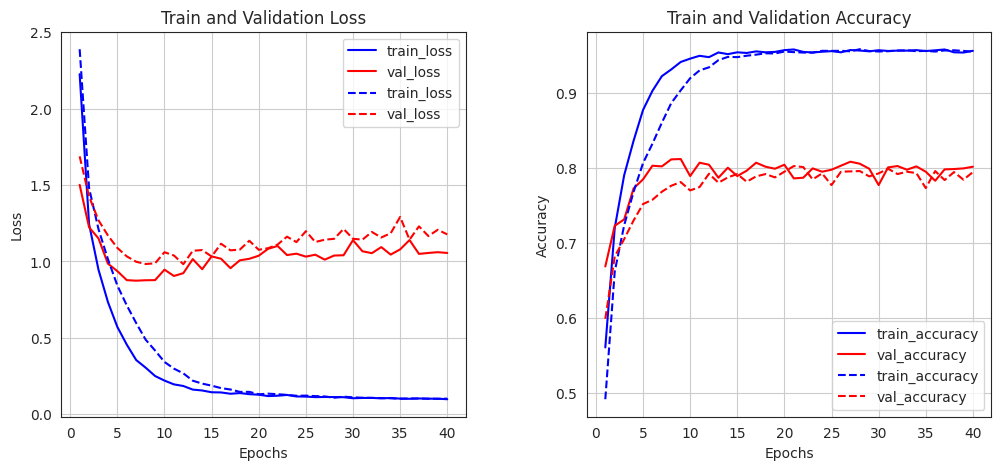

In [142]:
diff_history(history, normal_history)

###### Xavier(Glorot) 초기화

In [143]:
glorot_history = build_model(initializers.GlorotNormal())

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.4308 - loss: 2.8533 - val_accuracy: 0.6687 - val_loss: 1.4937
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7247 - loss: 1.2664 - val_accuracy: 0.7253 - val_loss: 1.1928
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7961 - loss: 0.9193 - val_accuracy: 0.7467 - val_loss: 1.0716
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8522 - loss: 0.6942 - val_accuracy: 0.7569 - val_loss: 1.0430
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8760 - loss: 0.5649 - val_accuracy: 0.7930 - val_loss: 0.9212
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9067 - loss: 0.4356 - val_accuracy: 0.7912 - val_loss: 0.9026
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9312 - loss: 0.3374 - val_accuracy: 0.7961 - val_loss: 0.9005
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9385 - loss: 0.2807 - val_accuracy: 0.7992 - 

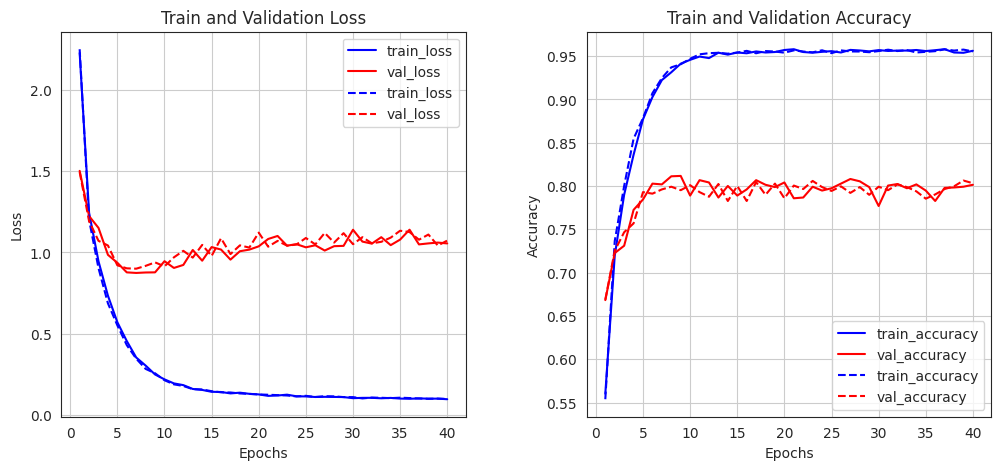

In [144]:
diff_history(history, glorot_history)

###### He 초기화

In [145]:
he_history = build_model(initializers.HeNormal())

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.4569 - loss: 2.8016 - val_accuracy: 0.6696 - val_loss: 1.4434
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7237 - loss: 1.2172 - val_accuracy: 0.7444 - val_loss: 1.1706
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8217 - loss: 0.8279 - val_accuracy: 0.7707 - val_loss: 1.0088
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8736 - loss: 0.6016 - val_accuracy: 0.7765 - val_loss: 0.9694
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9065 - loss: 0.4526 - val_accuracy: 0.7939 - val_loss: 0.8904
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9273 - loss: 0.3414 - val_accuracy: 0.7765 - val_loss: 0.9870
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9359 - loss: 0.2899 - val_accuracy: 0.7792 - val_loss: 0.9963
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9454 - loss: 0.2364 - val_accuracy: 0.7934 - v

#### 10-03 배치 정규화
- 모델에 입력되는 샘플들을 균일하게 만드는 방법
- 가중치의 활성화값이 적당히 퍼지게끔 '강제'로 적용
  - 보통 미니배치 단위로 데이터의 평균이 0, 표준편차는 1로 정규화를 수행하여 학습 자체가 빨리 진행될 수 있도록 만들어주고,   
  학습 후에도 새로운 데이터에 일반화가 잘 될 수 있도록 도와줍니다. 또한, 초기값에 크게 의존하지 않아도 되고,    
  과대적합을 방지하는 역할을 수행

##### 모델 구성 및 컴파일

In [146]:
import tensorflow as tf
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Dense(128, input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(128, name='hidden'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (Dense)                   │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden (Dense)                  │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 46)             │         5,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,303,598 (4.97 MB)

 Trainable params: 1,303,086 (4.97 MB)

 Non-trainable params: 512 (2.00 KB)

In [147]:
batch_norm_history = model.fit(x_train, y_train,
                               epochs=40,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.5158 - loss: 2.3075 - val_accuracy: 0.7391 - val_loss: 3.3163
Epoch 2/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8826 - loss: 0.6498 - val_accuracy: 0.7351 - val_loss: 3.0762
Epoch 3/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9329 - loss: 0.3639 - val_accuracy: 0.7195 - val_loss: 2.7307
Epoch 4/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9537 - loss: 0.2203 - val_accuracy: 0.6915 - val_loss: 2.3764
Epoch 5/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9579 - loss: 0.1622 - val_accuracy: 0.6736 - val_loss: 2.0721
Epoch 6/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9578 - loss: 0.1369 - val_accuracy: 0.6955 - val_loss: 1.7462
Epoch 7/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9601 - loss: 0.1250 - val_accuracy: 0.6879 - val_loss: 1.5753
Epoch 8/40
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9539 - loss: 0.1215 - val_accuracy: 0.7248 - 

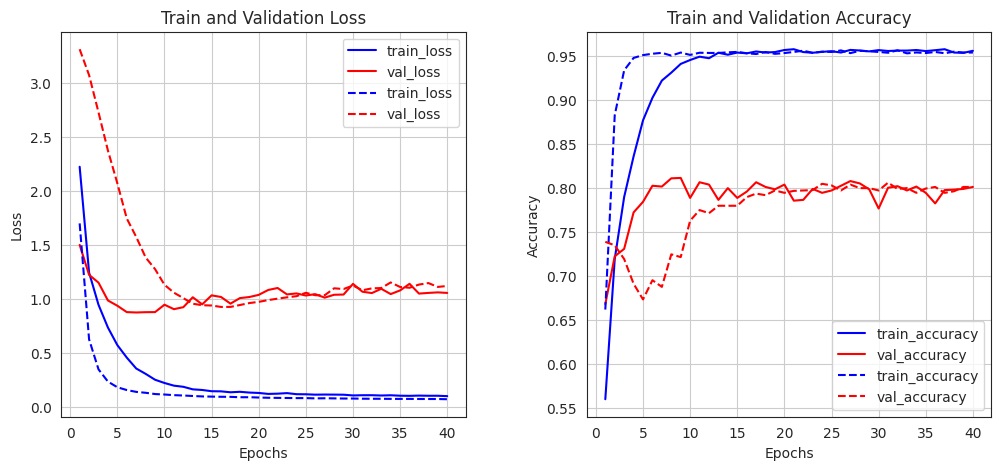

In [148]:
diff_history(history, batch_norm_history)